<a href="https://colab.research.google.com/github/JeongCheolHee/colab/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#차원축소 => 픽셀 줄이기?
#다차원 배열일 땐 축의 갯수로 차원을 나눔, 1차원일 땐 원소의 개수로 차원을 나눔

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-02-03 07:43:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-03 07:43:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-03 07:43:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) #주성분개수 지정
pca.fit(fruits_2d) #비지도 학습이므로 fit()메서드에 타깃값을 제공하지 않음

PCA(n_components=50)

In [8]:
print(pca.components_.shape) #주성분 50개 , 원본 데이터의 툭성 개수 10000

(50, 10000)


In [12]:
#주성분 그림으로 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):   #arr : 클러스터
  n = len(arr) #n은 샘플의 개수
  rows = int(np.ceil(n/10) ) #행의 개수 : 한 줄에 10개씩 이미지를 그리기 때문에 샘플 개수를 10으로 나누어 전체 행 개수를 계산
  cols = n if rows < 2 else 10 #열의 개수 : 행이 1개이면 열의 개수는 샘플 개수 그렇지 않다면 10개
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: #n개까지만 그림
        axs[i,j].imshow(arr[i*10 +j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

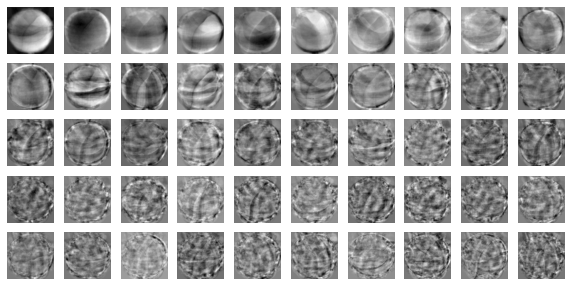

In [14]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [15]:
print(fruits_2d.shape)

(300, 10000)


In [17]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #10000개의 특성을 50개로 축소

(300, 50)


In [19]:
#원본 데이터 재구성, 데이터 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


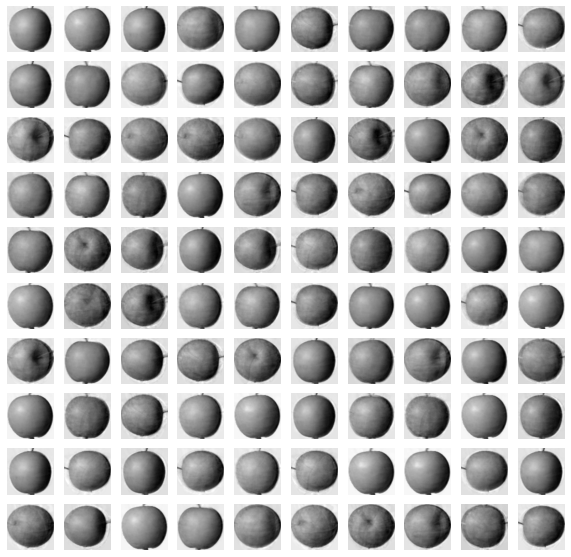

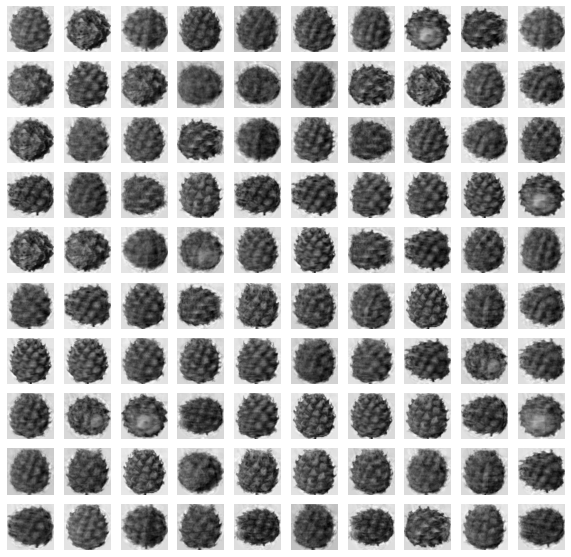

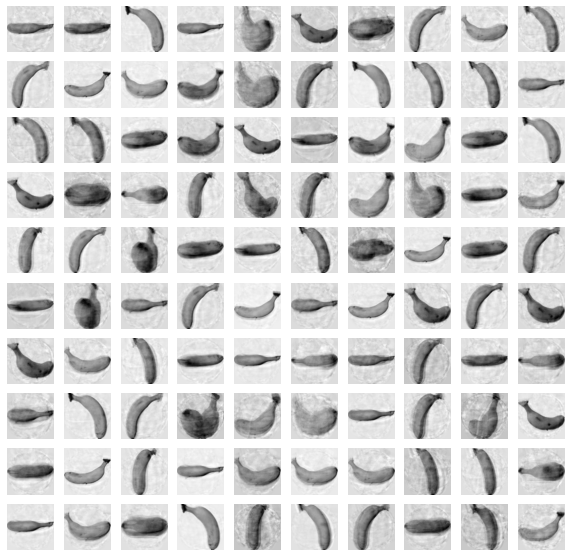

In [21]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in  [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

In [24]:
#설명된 분산(주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값)
print(np.sum(pca.explained_variance_ratio_)) #각 주성분의 설명된 분산 비율들의 합 = 50개의 주성분으로 표현하고 있는 총 분산 비율

0.9215360499976752


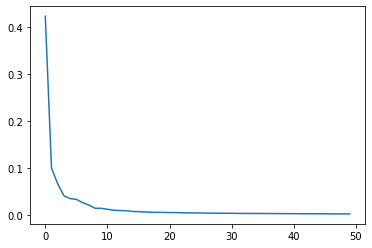

In [25]:
#설명된 분산의 비율을 그래프로 그려 적절한 주성분의 개수를 찾을 수 있음
plt.plot(pca.explained_variance_ratio_)

In [26]:
#차원 축소된 데이터를 사용하여 지도학습 모델 훈련 => 원본 데이터와 차이 확인
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
#지도 학습 모델을 사용하기 위해 타깃값 설정 사과0 파인애플1 바나나2
import numpy as np
target = np.array([0]*100 + [1]*100 + [2]*100)

In [32]:
#원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target) #cross_validate를 통한 교차검증
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6919942378997803


In [35]:
#축소 데이터 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#정확도도 높고 훈련 속도도 높음

1.0
0.0688699722290039


In [36]:
#설명된 분산 비율 설정
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [42]:
print(pca.n_components_) #2개의 특성으로 원본 데이터 50% 표현 가능
fruits_pca = pca.transform(fruits_2d)


2


In [43]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03857746124267578


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


<function matplotlib.pyplot.show(*args, **kw)>

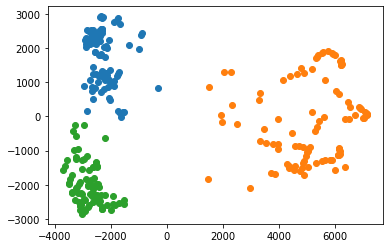

In [46]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.show
#데이터 차원이 줄으면 시각화가 편리